# Main

In [7]:
"""Scripts for analyzing of phantom outputs.

This script analyze the json files written from the main frame and produce a plot.

"""

'Scripts for analyzing of phantom outputs.\n\nThis script analyze the json files written from the main frame and produce a plot.\n\n'

## Imports & Settings

In [8]:
#%matplotlib inline
import math
import numpy as np
from numpy import pi
#import pandas
from astropy import units
from astropy import constants as const
import matplotlib.pyplot as plt
import matplotlib as mpl
from moviepy.editor import ImageSequenceClip
from os import path

In [9]:
# import modules listed in ./lib/

from lib import clmuphantomlib as mupl
from lib.clmuphantomlib.readwrite import json_load
from lib.clmuphantomlib.units_util import set_as_quantity, get_val_in_unit, get_units_field_name, get_units_cgs

    ## import modules in arbitrary directory
    
    #import sys
    
    ## path to my python module lib directory
    ## *** CHECK THIS! *** #
    #SRC_LIB_PATH = sys.path[0] + '/lib'
    
    #if SRC_LIB_PATH not in sys.path:
    #    sys.path.append(SRC_LIB_PATH)
    ##print(*sys.path, sep='\n')    # debug
    #print(
    #    "\n*   Please Make sure my module files are located in this directory (or change the SRC_LIB_PATH variable):",
    #    f"\n{SRC_LIB_PATH = }\n"
    #)

    # parallels & optimizations
    
    
    #import os
    ## Fixing stupid numba killing kernel
    ## See here https://github.com/numba/numba/issues/3016
    #os.environ['NUMBA_DISABLE_INTEL_SVML']  = '1'
    #from numba import njit, prange
    
    
    from multiprocessing import cpu_count, Process, Queue
    
    NPROCESSES = cpu_count()
    if NPROCESSES is None:
        NPROCESSES = 1
    NPROCESSES = max(NPROCESSES, 1)


In [10]:
# settings
#
#   imported from script_input.py file


from script_PhLocAxes__input import iverbose, unitsIn, unitsOut, fps, PHOTOSPHERE_TAU, JOB_PROFILES, JOB_PROFILES_GROUPS


debug_times_yr = (-1., 0.5, 12., 20., 40.)

unitsOutTxt = {  key  : unitsOut[key].to_string('latex_inline') for key in unitsOut.keys() }

tounitsOut  = { unitsType: (1*unitsIn[unitsType]).to_value(unitsOut[unitsType]) for unitsType in unitsOut.keys()}


plt.rcParams.update({'font.size': 20})


# print debug info
if iverbose >= 2:
    #print(f"   Note: Will use {NPROCESSES} processes for parallelization")
    pass
    

# Analysis

In [15]:
do_debug = True
if __name__ == '__main__':
    from script_PhLocAxes__input import JOB_PROFILES
    if do_debug:
        JOB_PROFILES = JOB_PROFILES[2:4]

In [12]:
def get_yval_yerr(
    xval, xerrp, xerrm, xvals, yvals,
) -> (float, float, float):
    """Get y value, error (+), error (-) by interpolating y(x) at x_val."""
    #yval, yerrp, yerrm = get_yval_yerr(xval, xerrp, xerrm, xvals, yvals)
    yval, yerrp_tmp, yerrm_tmp = np.interp((xval, xerrp, xerrm), xvals[::-1], yvals[::-1])
    yerrs = yvals[(xerrm < xvals) & (xvals < xerrp) & np.isfinite(yvals)]
    if len(yerrs) >= 1:
        yerrs = [np.max(yerrs), np.min(yerrs)]
    else:
        yerrs = []
    if not np.isfinite(yerrp_tmp):
        yerrs.append(yerrp_tmp)
    if not np.isfinite(yerrm_tmp):
        yerrs.append(yerrm_tmp)
    if len(yerrs) >= 2:
        yerrp, yerrm = np.max(yerrs), np.min(yerrs)
    else:
        yerrp, yerrm = np.nan, np.nan
    return yval, yerrp, yerrm

## Photosphere size vs time

Debug:  ../photosphere/luis_2md/light
times_yr_inds  : [ 0.          0.75752451  1.26254085  1.51504902  1.76755719  2.02006536
  2.27257353  2.5250817   2.77758987  3.03009804  3.28260621  3.53511438
  3.78762255  4.04013072  4.29263889  4.54514706  4.79765523  5.0501634
  5.30267157  5.55517974  5.80768791  6.06019608  6.31270425  6.56521241
  6.81772058  7.07022875  7.32273692  7.57524509  8.08026143  8.3327696
  8.58527777  8.83778594 20.        ]
orbseps_au_inds: [2.55867612 2.52983458 2.50335881 2.42630296 2.32112199 2.19230499
 2.0513716  1.92428489 1.82509168 1.72966339 1.60836411 1.41919068
 1.16432636 0.94791105 0.80993795 0.61982267 0.53260373 0.43290011
 0.32394156 0.2780844  0.2466206  0.23228086 0.22093317 0.21850803
 0.21001657 0.20400841 0.20153979 0.20144038 0.2013519  0.19878127
 0.19523764 0.19290429 0.19290236]
time=0.0, y=2.178815218896539, y_err=0.26025487780552736
    y_data_xypm=array([2.16056352, 2.19372695, 2.14032277, 2.16428033, 2.16583136,
       2.24655859

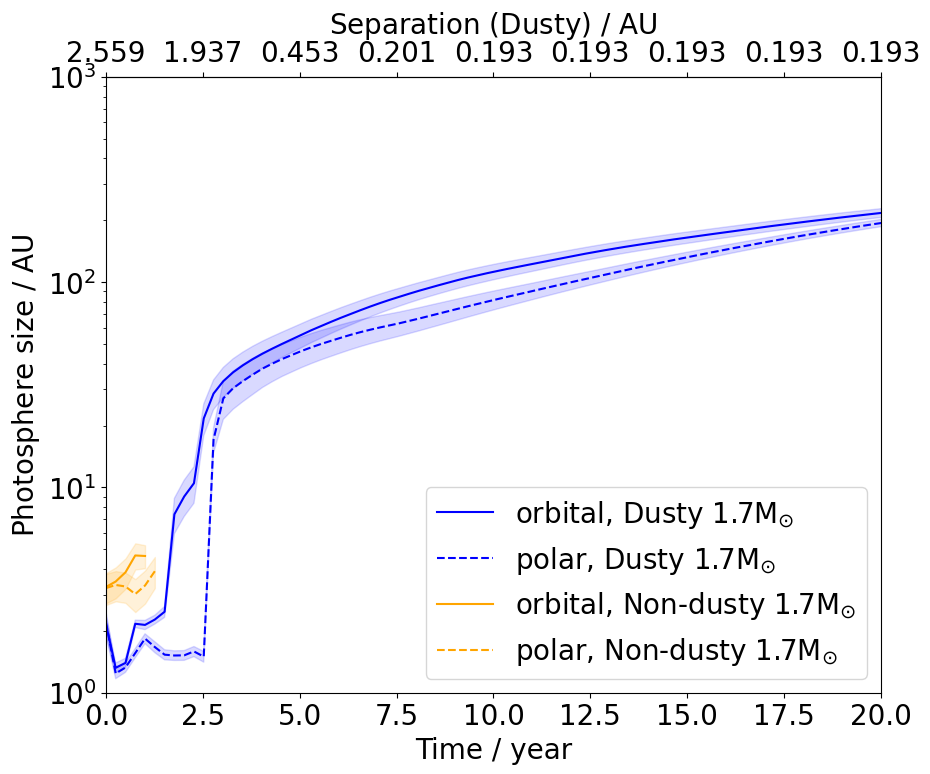

Debug:  ../photosphere/luis_4md/light
times_yr_inds  : [ 0.          0.25250817  0.50501634  1.01003268  1.26254085  1.51504902
  1.76755719  2.02006536  2.27257353  2.5250817   2.77758987  3.03009804
  3.28260621  3.53511438  3.78762255  4.04013072  4.29263889  4.54514706
  4.79765523  5.0501634   5.30267157  5.55517974  5.80768791  6.06019608
  6.31270425  6.56521241  6.81772058  7.07022875  7.32273692  7.57524509
  8.08026143  8.83778594  9.59531045 11.86788398 12.12039215 12.37290032
 13.63544117 14.89798202 20.        ]
orbseps_au_inds: [2.96341217 2.96286731 2.9579851  2.95153536 2.89376004 2.86035093
 2.82791578 2.78154471 2.71988305 2.64211765 2.55873554 2.47335158
 2.38042473 2.26283634 2.11166654 1.91524545 1.64491999 1.26009846
 0.8977833  0.44049424 0.26949729 0.15726407 0.1103882  0.08807392
 0.07649083 0.07300434 0.06868083 0.06280955 0.06264555 0.05837203
 0.05714545 0.05614853 0.05579529 0.05572647 0.05462643 0.05460694
 0.05447001 0.05442068 0.05442013]
time=0.0, y=2.1

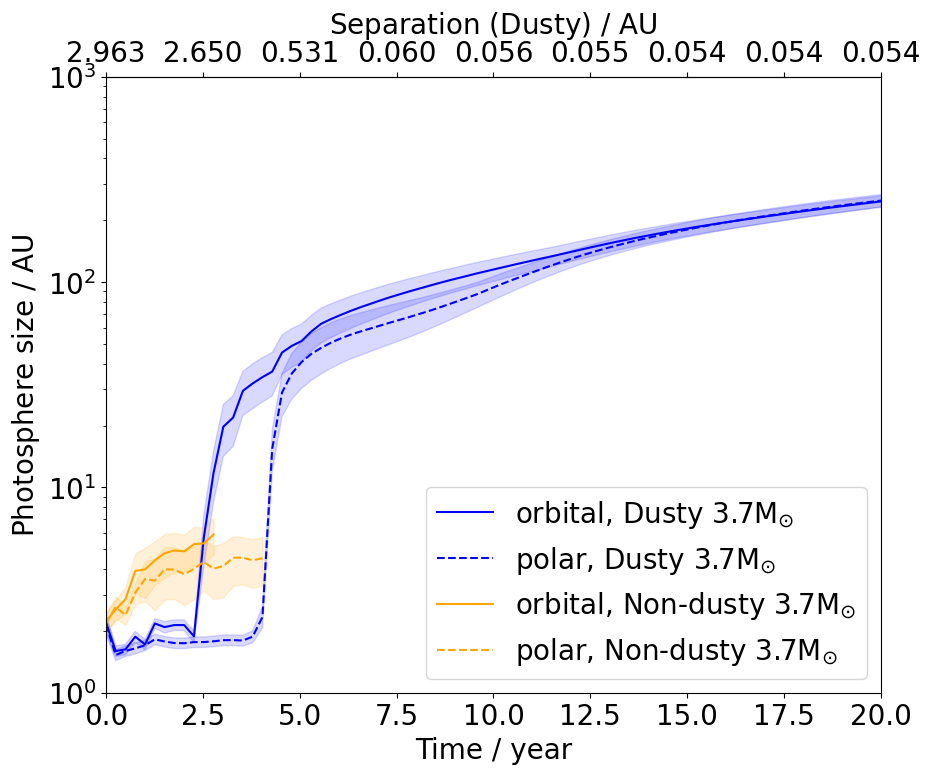

In [13]:
if __name__ == '__main__':

    # plotting

    #keys = rays_dir.keys()
    ylim = (1., 1000.)
    #x_use = 'time'
    
    xlims = {
        '2m': (0., 20.),
        '4m': (0., 20.),
    }
    
    for group_name in JOB_PROFILES_GROUPS.keys():
    
    
        fig, ax = plt.subplots(figsize=(10, 8))
        xlim = xlims[group_name]
        
        for i, job_profile in enumerate(JOB_PROFILES_GROUPS[group_name]):
            job_name = job_profile['job_name']
            with open(f"{job_name}__photospherePars__xyz.json", 'r') as f:
                photosphere_pars = json_load(f)
    
    
            times_yr = np.array(photosphere_pars['time_yr'])
            orbseps_au = np.array(photosphere_pars['orbsep_Rsun']) * tounitsOut['dist']
            x = times_yr
            
            if i == 0:
                # getting funcs for 2nd x axis transform, and
                # making sure orbseps_au is mono-decreasing, so np.interp doesn't freak out
                orbsep_tempmin = orbseps_au[0]
                x_inds = [0]
                for i in range(len(orbseps_au)):
                    if orbsep_tempmin > orbseps_au[i]:
                        orbsep_tempmin = orbseps_au[i]
                        x_inds.append(i)
                times_yr_inds   = times_yr[x_inds].copy()
                orbseps_au_inds = orbseps_au[x_inds].copy()
                if xlim[1] > times_yr_inds[-1]:
                    # add an end point so the secondary xaxis labels of orbsep does not freak out
                    times_yr_inds   = np.append(times_yr_inds, xlim[1])
                    orbseps_au_inds = np.append(orbseps_au_inds, orbseps_au_inds[-1]*(1.-1e-5))
                functions = (
                    lambda x: np.interp(x, times_yr_inds, orbseps_au_inds),
                    lambda x: np.interp(x, orbseps_au_inds[::-1], times_yr_inds[::-1]),
                )
                if iverbose >= 3:
                    print(f"Debug:  {job_name}\ntimes_yr_inds  : {times_yr_inds}\norbseps_au_inds: {orbseps_au_inds}")
                
                
            y_data_xypm     = np.array([photosphere_pars['data'][key]['size'] for key in ('+x', '-x', '+y', '-y',)])
            y_err_data_xypm = np.array([photosphere_pars['data'][key]['h'] for key in ('+x', '-x', '+y', '-y',)])
            y     = np.average(    y_data_xypm**2, axis=0)**0.5 * tounitsOut['dist']
            y_err = np.average(y_err_data_xypm**2, axis=0)**0.5 * tounitsOut['dist']
    
            ax.semilogy(x, y, '-', color=job_profile['color'], label=f"orbital, {job_profile['name']}")    
            ax.fill_between(x, y-y_err, y+y_err, color=job_profile['color'], alpha=0.15)
            if iverbose >= 4:
                print(f"Photosphere size(orbital):\n time(yr): size({unitsOutTxt['dist']})\n{ {x_i : y_i for x_i, y_i in zip(x, y)} }")
            
            
            y_data_zpm     = np.array([photosphere_pars['data'][key]['size'] for key in ('+z', '-z',)])
            y_err_data_zpm = np.array([photosphere_pars['data'][key]['h'] for key in ('+z', '-z',)])
            y     = np.average(    y_data_zpm**2, axis=0)**0.5 * tounitsOut['dist']
            y_err = np.average(y_err_data_zpm**2, axis=0)**0.5 * tounitsOut['dist']
    
            ax.semilogy(x, y, '--', color=job_profile['color'], label=f"polar, {job_profile['name']}")
            ax.fill_between(x, y-y_err, y+y_err, color=job_profile['color'], alpha=0.15)
            if iverbose >= 4:
                print(f"Photosphere size(polar):\n time(yr): size({unitsOutTxt['dist']})\n{ {x_i : y_i for x_i, y_i in zip(x, y)} }")

            if iverbose >= 3:
                for debug_time_yr in debug_times_yr:
                    debug_inds = np.where(np.array(photosphere_pars['time_yr']) > debug_time_yr)[0]
                    if len(debug_inds):
                        debug_ind = debug_inds[0]
                        all_axes_names = ('+x', '-x', '+y', '-y', '+z', '-z')
                        time = photosphere_pars['time_yr'][debug_ind]
                        y_data_xypm     = np.array([photosphere_pars['data'][key]['size'][debug_ind] for key in all_axes_names]
                                                  ) * tounitsOut['dist']
                        y_err_data_xypm = np.array([photosphere_pars['data'][key]['h'][debug_ind] for key in all_axes_names]
                                                  ) * tounitsOut['dist']
                        y     = np.average(    y_data_xypm**2, axis=0)**0.5
                        y_err = np.average(y_err_data_xypm**2, axis=0)**0.5
                        print(f"{time=}, {y=}, {y_err=}\n    {y_data_xypm=}\n    {y_err_data_xypm=}")
                    
            
    
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_xlabel("Time / year")
        ax.set_ylabel(f"Photosphere size / {unitsOutTxt['dist']}")
        
        secax = ax.secondary_xaxis('top', functions=functions)
        secax.set_xlabel(f"Separation (Dusty) / {unitsOutTxt['dist']}")
        secax.set_ticks(functions[0](ax.get_xticks()))
        #secax.set_ticks(ax.get_xticks())
        
        #ax.text(
        #    0.98, 0.98,
        #    f"$\\mu = {mu} $",
        #    color = "black", ha = 'right', va = 'top',
        #    transform=ax.transAxes,
        #)
        ax.legend(loc="lower right")
        #ax.set_title("Photosphere size\n" + f"resolution = {mpdf.params['nparttot']:.2e}",)
    
    
        outfilename_x = 't+sep'
        outfilename_noext = f"fig__{group_name}__photosphereSize-{outfilename_x}__xyz"
        fig.savefig(f"{outfilename_noext}.pdf")
        fig.savefig(f"{outfilename_noext}.png")
        plt.show()
        plt.close(fig)

In [14]:
# Temp vs Rad plots

if __name__ == '__main__':

    # settings
    xlim = (1e-1, 2e3)
    labels = ['+x', '+z']    # name of the ray to be plotted
    quans  = ['tau', 'kappa', 'T', 'rho']    # quantities to be plotted
    ylims  = {   # Note: you can supply None
        'tau': (5e-6, 5e5),
        'rho': (5e-20, 5e-6), # None
        'T'  : (1e1, 5e5),
        'kappa': (1e-5, 1e3),
    }
    ylabels = {
        'tau': "\\tau",
        'rho': "\\rho",
        'T'  : "T",
        'kappa': "\\kappa",
    }
    

    # plotting
    for job_profile in JOB_PROFILES:
        job_name    = job_profile['job_name']
        outfilenames = []
        for file_index in job_profile['file_indexes']:
            # load data
            jobfilename = mupl.get_filename_phantom_dumps(job_name, file_index)
            outfilename_noext = f"{jobfilename}__photospherePars__xyz"
            if iverbose: print(f"\nWorking on {outfilename_noext}... ", end='')
            with open(f"{outfilename_noext}.json", 'r') as f:
                photosphere_pars = json_load(f)
        
            time = set_as_quantity(photosphere_pars['time_yr'], units.yr)
            #orbsep_Rsun = np.array(photosphere_pars['orbsep_Rsun'])

        
            fig, axes = plt.subplots(len(quans), figsize=(10, 2+4*len(quans)), squeeze=False, sharex=True)
            fig.subplots_adjust(hspace=0.0, wspace=0.0)

            xerrs_dict = {}
            for i, label in enumerate(labels):
                photosphere = photosphere_pars['data'][label]
                xval  = get_val_in_unit(photosphere['R1'       ], unitsIn['dist'], unitsOut['dist'])
                xerr  = get_val_in_unit(photosphere['h'        ], unitsIn['dist'], unitsOut['dist'])
                xvals = get_val_in_unit(photosphere['R1_on_ray'], unitsIn['dist'], unitsOut['dist'])
                xerrs_dict[label] = (xval, xerr, xvals)
                
                
            for ax, quan in zip(axes, quans):
                ax = ax[0]
                ylim = ylims[quan] if quan in ylims.keys() else None
                ylabel = ylabels[quan] if quan in ylabels.keys() else None
                unit_name = get_units_field_name(quan)
                valtxts = []
                yvaltxt_logs = []
                yerrs_dict = {}
                
                for i, label in enumerate(labels):
                    photosphere = photosphere_pars['data'][label]
                    xval, xerr, xvals = xerrs_dict[label]
                    xerrp = xval + xerr
                    xerrm = xval - xerr

                    yvals = get_val_in_unit(photosphere[f'{quan}_on_ray'], unitsIn[unit_name], unitsOut[unit_name])
                    yval, yerrp, yerrm = get_yval_yerr(xval, xerrp, xerrm, xvals, yvals)
                    dyerrp = yerrp - yval
                    dyerrm = yerrm - yval
                    # store it for later because we want them to be on the same scale for +x and +z
                    yerrs_dict[label] = (yval, dyerrp, dyerrm)
                    
                    ax.loglog(xvals, yvals, color=f'C{i}', label=label)
                    ax.set_xlim(xlim)
                    ax.set_ylim(ylim)
                    ax.fill_betweenx(
                        ax.get_ylim(),
                        get_val_in_unit(photosphere['R1'] - photosphere['h'], unitsIn['dist'], unitsOut['dist']),
                        get_val_in_unit(photosphere['R1'] + photosphere['h'], unitsIn['dist'], unitsOut['dist']),
                        color=f'C{i}', alpha=0.1)
                    ax.set_ylabel(f"${ylabel}$ / {unitsOutTxt[unit_name]}" if unit_name != 'dimless' else f"${ylabel}$")
                    if quan == 'tau':
                        ax.axhline(PHOTOSPHERE_TAU, color='grey', linestyle='dashed')

                    # get the scale of the value for the exact val & err text
                    try:
                        yvaltxt_log = np.log10(np.abs([yval, dyerrm, dyerrp]))
                        yvaltxt_log = int(np.floor(np.average(yvaltxt_log[np.isfinite(yvaltxt_log)])))
                        if quan in ['tau','T']:
                            # mannual override
                            yvaltxt_log = 0
                    except ValueError:
                        yvaltxt_log = 0
                    yvaltxt_logs.append(yvaltxt_log)


                # get val text
                for label in labels:
                    # init
                    yvaltxt_log = min(yvaltxt_logs)
                    yval, dyerrp, dyerrm = yerrs_dict[label]
                    
                    # ignore small scales
                    if yvaltxt_log == 1: yvaltxt_log = 0
                        
                    yvaltxt  = f"${ylabel}_{{{label}}} ="
                    yvaltxt += f"{yval/10**yvaltxt_log:.1f}^{{{dyerrp/10**yvaltxt_log:+.1f}}}_{{{dyerrm/10**yvaltxt_log:+.1f}}}$"
                    if yvaltxt_log != 0: yvaltxt += f" $10^{{{yvaltxt_log}}}$"
                    yvaltxt += f" {unitsOutTxt[unit_name]}"
                    yvaltxt += f" ({(abs(dyerrp)+abs(dyerrm))/yval/2:.0%})"
                    
                    valtxts.append(yvaltxt)
                    
                ax.text(xlim[0], ylim[0], '\n'.join(valtxts), ha='left', va='bottom')
            ax.set_xlabel(f"$R_1$ / {unitsOutTxt['dist']}")
            ax.legend(loc='upper right')

            # set title and time label
            ax = axes[0][0]
            ax_txts = [f"Time = {time:.1f}"]
            for label in labels:
                xval, xerr, _ = xerrs_dict[label]
                ax_txts.append(f"$R_{{1, \\mathrm{{{label}, ph}}}} = {xval:.1f} \\pm {xerr:.1f}$ {unitsOutTxt['dist']}")
            
            ax.text(
                0.98, 0.98,
                '\n'.join(ax_txts),
                color = "black", ha = 'right', va = 'top',
                transform=ax.transAxes,
            )
            ax.set_title(
                f"Properties along one singe ray\n" + \
                #f"resolution = {photospheres['dump_info']['nparttot']:.2e}\n" + \
                f"{job_profile['plot_title_suffix']}",
            )
            # save fig
            outfilename = f"{jobfilename}__singleRayProperties.png"
            outfilenames.append(outfilename)
            fig.savefig(outfilename)
            plt.close(fig)
            if iverbose: print(f"Done.\n")

        # define job_folder_prefix
        for i in range(len(job_name)-1, -1, -1):
            if job_name[i] == path.sep:
                job_folder_prefix = job_name[:i]
                break
            else:
                job_folder_prefix = job_name
        with ImageSequenceClip(outfilenames, fps=fps) as vid:
            moviefilename = f"{job_folder_prefix}__singleRayProperties__movie.mp4"
            vid.write_videofile(moviefilename)

    if iverbose: print("\n\n\n*** All Done. ***\n\n\n")


Working on ../photosphere/luis_2md/light_00000__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00100__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00200__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00300__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00400__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00500__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00600__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00700__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00800__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_00900__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_01000__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/light_01100__photospherePars__xyz... Done.


Working on ../photosphere/luis_2md/ligh

Moviepy - Done !
Moviepy - video ready ../photosphere/luis_2md__singleRayProperties__movie.mp4

Working on ../photosphere/luis_4md/light_00000__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00100__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00200__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00300__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00400__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00500__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00600__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00700__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00800__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_00900__photospherePars__xyz... Done.


Working on ../photosphere/luis_4md/light_01000__photospherePars__xyz... Done.


Working on ../photospher

Moviepy - Done !
Moviepy - video ready ../photosphere/luis_4md__singleRayProperties__movie.mp4

Working on ../photosphere/miguel_2m/binary_00000__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00100__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00200__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00300__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00400__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00500__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00600__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00700__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00800__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_00900__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m/binary_01000__photospherePars__xyz... Done.


Wo

Moviepy - Done !
Moviepy - video ready ../photosphere/miguel_2m__singleRayProperties__movie.mp4

Working on ../photosphere/miguel_4m/binary_00000__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00100__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00200__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00300__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00400__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00500__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00600__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00700__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00800__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_00900__photospherePars__xyz... Done.


Working on ../photosphere/miguel_4m/binary_01000__photospherePars__xyz... Done.


W

Moviepy - Done !
Moviepy - video ready ../photosphere/miguel_4m__singleRayProperties__movie.mp4

Working on ../photosphere/miguel_2m_2022/binary_00000__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00100__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00200__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00300__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00400__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00500__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00600__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00700__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00800__photospherePars__xyz... Done.


Working on ../photosphere/miguel_2m_2022/binary_00900__photospherePars__xyz... Done.


Working on ../photosphere/miguel_

Moviepy - Done !
Moviepy - video ready ../photosphere/miguel_2m_2022__singleRayProperties__movie.mp4



*** All Done. ***






Working on ../photosphere/miguel_2m/binary_00600__photospherePars__xyz... 

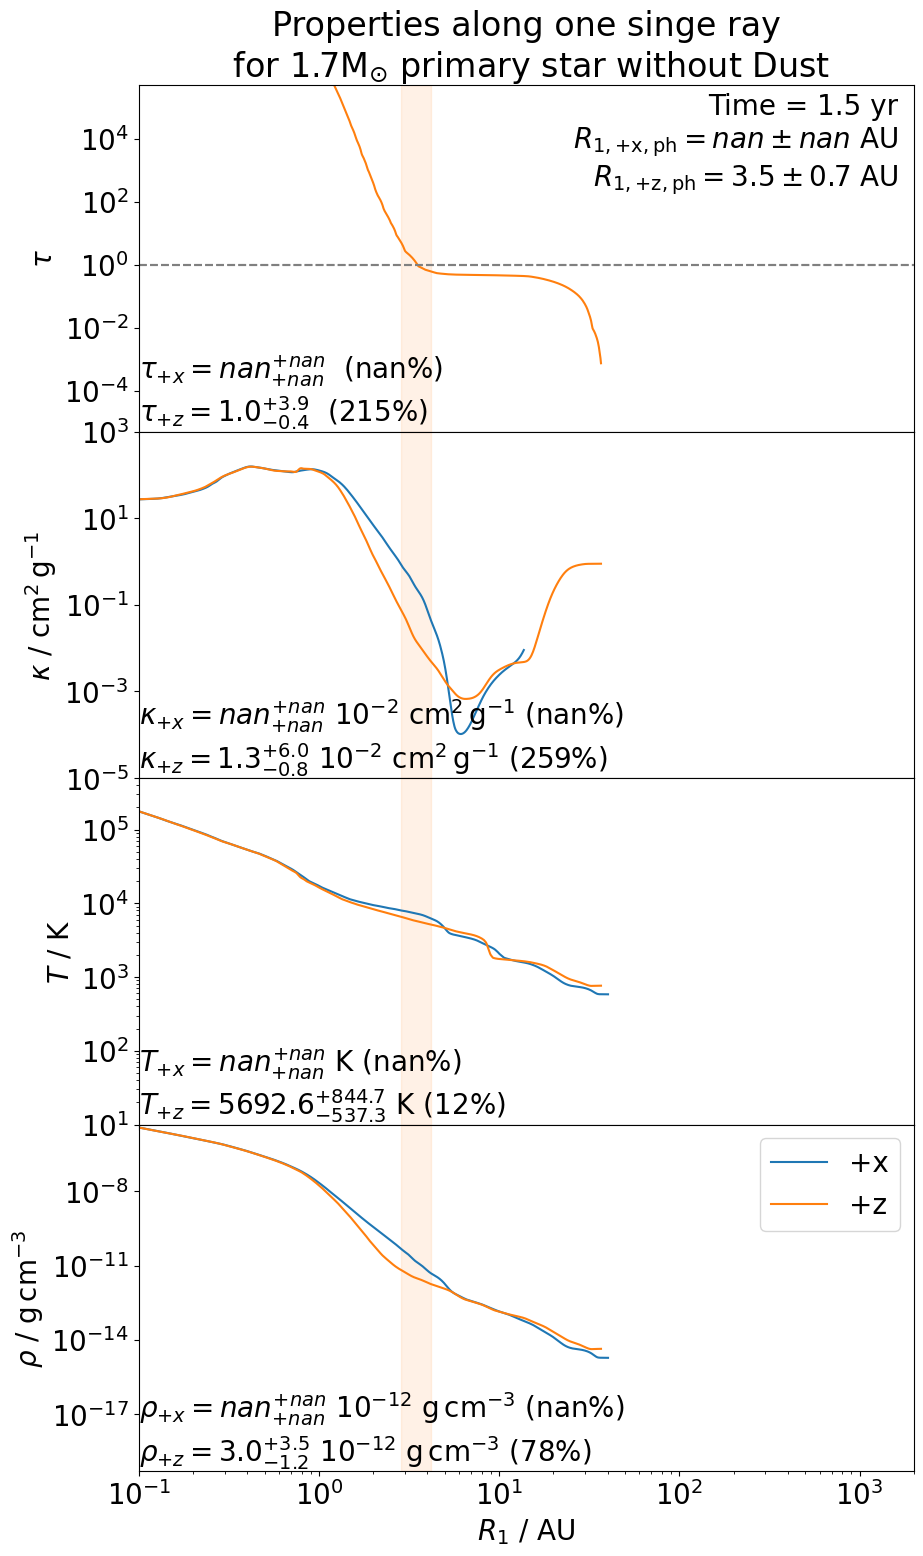

In [18]:
do_debug = True
if do_debug:
    xlim = (1e-1, 2e3)
    labels = ['+x', '+z']    # name of the ray to be plotted
    quans  = ['tau', 'kappa', 'T', 'rho']    # quantities to be plotted
    ylims  = {   # Note: you can supply None
        'tau': (5e-6, 5e5),
        'rho': (5e-20, 5e-6), # None
        'T'  : (1e1, 5e5),
        'kappa': (1e-5, 1e3),
    }
    ylabels = {
        'tau': "\\tau",
        'rho': "\\rho",
        'T'  : "T",
        'kappa': "\\kappa",
    }
    

    # plotting
    for job_profile in JOB_PROFILES[:1]:
        job_name    = job_profile['job_name']
        outfilenames = []
        for file_index in job_profile['file_indexes'][:1]:
            file_index = 600
            # load data
            jobfilename = mupl.get_filename_phantom_dumps(job_name, file_index)
            outfilename_noext = f"{jobfilename}__photospherePars__xyz"
            if iverbose: print(f"\nWorking on {outfilename_noext}... ", end='')
            with open(f"{outfilename_noext}.json", 'r') as f:
                photosphere_pars = json_load(f)
        
            time = set_as_quantity(photosphere_pars['time_yr'], units.yr)
            #orbsep_Rsun = np.array(photosphere_pars['orbsep_Rsun'])

        
            fig, axes = plt.subplots(len(quans), figsize=(10, 2+4*len(quans)), squeeze=False, sharex=True)
            fig.subplots_adjust(hspace=0.0, wspace=0.0)

            xerrs_dict = {}
            for i, label in enumerate(labels):
                photosphere = photosphere_pars['data'][label]
                xval  = get_val_in_unit(photosphere['R1'       ], unitsIn['dist'], unitsOut['dist'])
                xerr  = get_val_in_unit(photosphere['h'        ], unitsIn['dist'], unitsOut['dist'])
                xvals = get_val_in_unit(photosphere['R1_on_ray'], unitsIn['dist'], unitsOut['dist'])
                xerrs_dict[label] = (xval, xerr, xvals)
                
                
            for ax, quan in zip(axes, quans):
                ax = ax[0]
                ylim = ylims[quan] if quan in ylims.keys() else None
                ylabel = ylabels[quan] if quan in ylabels.keys() else None
                unit_name = get_units_field_name(quan)
                valtxts = []
                yvaltxt_logs = []
                yerrs_dict = {}
                
                for i, label in enumerate(labels):
                    photosphere = photosphere_pars['data'][label]
                    xval, xerr, xvals = xerrs_dict[label]
                    xerrp = xval + xerr
                    xerrm = xval - xerr

                    yvals = get_val_in_unit(photosphere[f'{quan}_on_ray'], unitsIn[unit_name], unitsOut[unit_name])
                    yval, yerrp, yerrm = get_yval_yerr(xval, xerrp, xerrm, xvals, yvals)
                    dyerrp = yerrp - yval
                    dyerrm = yerrm - yval
                    # store it for later because we want them to be on the same scale for +x and +z
                    yerrs_dict[label] = (yval, dyerrp, dyerrm)
                    
                    ax.loglog(xvals, yvals, color=f'C{i}', label=label)
                    ax.set_xlim(xlim)
                    ax.set_ylim(ylim)
                    ax.fill_betweenx(
                        ax.get_ylim(),
                        get_val_in_unit(photosphere['R1'] - photosphere['h'], unitsIn['dist'], unitsOut['dist']),
                        get_val_in_unit(photosphere['R1'] + photosphere['h'], unitsIn['dist'], unitsOut['dist']),
                        color=f'C{i}', alpha=0.1)
                    ax.set_ylabel(f"${ylabel}$ / {unitsOutTxt[unit_name]}" if unit_name != 'dimless' else f"${ylabel}$")
                    if quan == 'tau':
                        ax.axhline(PHOTOSPHERE_TAU, color='grey', linestyle='dashed')

                    # get the scale of the value for the exact val & err text
                    try:
                        yvaltxt_log = np.log10(np.abs([yval, dyerrm, dyerrp]))
                        yvaltxt_log = int(np.floor(np.average(yvaltxt_log[np.isfinite(yvaltxt_log)])))
                        if quan in ['tau','T']:
                            # mannual override
                            yvaltxt_log = 0
                    except ValueError:
                        yvaltxt_log = 0
                    yvaltxt_logs.append(yvaltxt_log)


                # get val text
                for label in labels:
                    # init
                    yvaltxt_log = min(yvaltxt_logs)
                    yval, dyerrp, dyerrm = yerrs_dict[label]
                    
                    # ignore small scales
                    if yvaltxt_log == 1: yvaltxt_log = 0
                        
                    yvaltxt  = f"${ylabel}_{{{label}}} ="
                    yvaltxt += f"{yval/10**yvaltxt_log:.1f}^{{{dyerrp/10**yvaltxt_log:+.1f}}}_{{{dyerrm/10**yvaltxt_log:+.1f}}}$"
                    if yvaltxt_log != 0: yvaltxt += f" $10^{{{yvaltxt_log}}}$"
                    yvaltxt += f" {unitsOutTxt[unit_name]}"
                    yvaltxt += f" ({(abs(dyerrp)+abs(dyerrm))/yval/2:.0%})"
                    
                    valtxts.append(yvaltxt)
                    
                ax.text(xlim[0], ylim[0], '\n'.join(valtxts), ha='left', va='bottom')
            ax.set_xlabel(f"$R_1$ / {unitsOutTxt['dist']}")
            ax.legend(loc='upper right')

            # set title and time label
            ax = axes[0][0]
            ax_txts = [f"Time = {time:.1f}"]
            for label in labels:
                xval, xerr, _ = xerrs_dict[label]
                ax_txts.append(f"$R_{{1, \\mathrm{{{label}, ph}}}} = {xval:.1f} \\pm {xerr:.1f}$ {unitsOutTxt['dist']}")
            
            ax.text(
                0.98, 0.98,
                '\n'.join(ax_txts),
                color = "black", ha = 'right', va = 'top',
                transform=ax.transAxes,
            )
            ax.set_title(
                f"Properties along one singe ray\n" + \
                #f"resolution = {photospheres['dump_info']['nparttot']:.2e}\n" + \
                f"{job_profile['plot_title_suffix']}",
            )
            # save fig
            outfilename = f"{jobfilename}__singleRayProperties.png"
            outfilenames.append(outfilename)
            plt.show(fig)

In [70]:
photosphere_pars['data']['+z']['T_on_ray']

array([   653.20543156,    653.20543156,    653.20300044,    653.06404558,
          652.7589476 ,    652.40859762,    652.07565697,    651.7796503 ,
          651.50869986,    651.20770864,    650.84868357,    650.44529141,
          650.01871825,    649.58685897,    649.16231054,    648.75302326,
          648.37153409,    648.15051784,    648.24489134,    648.76269224,
          649.76507123,    651.24878356,    653.16132097,    655.42745269,
          658.00550302,    660.89404715,    664.05916707,    667.44741653,
          670.99999998,    674.66081833,    678.41526953,    682.37252921,
          686.3737649 ,    690.39929129,    694.42611068,    698.43115782,
          702.40203931,    706.32687969,    710.20342025,    714.04956262,
          717.86009538,    721.62212195,    725.32711706,    728.96950915,
          732.54601546,    736.05828478,    739.51289738,    742.91378046,
          746.2638121 ,    749.57041956,    752.85939495,    756.16490726,
          759.51525548,  

In [71]:
rho, T = (
    get_val_in_unit(photosphere[f'{quan}_on_ray'], unitsIn[get_units_field_name(quan)], get_units_cgs(quan))
    for quan in ['rho', 'T']
)
opacs.get_kappa(rho, T)

array([8.34042419e-01, 8.34042419e-01, 8.34041211e-01, 8.33972163e-01,
       8.33820525e-01, 8.33646343e-01, 8.33480764e-01, 8.33333510e-01,
       8.33198685e-01, 8.33048872e-01, 8.32870119e-01, 8.32669205e-01,
       8.32456662e-01, 8.32241399e-01, 8.32029696e-01, 8.31825522e-01,
       8.31635145e-01, 8.31524819e-01, 8.31571930e-01, 8.31830345e-01,
       8.32330239e-01, 8.33069319e-01, 8.34020502e-01, 8.35145354e-01,
       8.36422165e-01, 8.37849146e-01, 8.39408415e-01, 8.41072612e-01,
       8.42812021e-01, 8.44598581e-01, 8.46424725e-01, 8.48342849e-01,
       8.50276055e-01, 8.52214245e-01, 8.54146258e-01, 8.56061136e-01,
       8.57953135e-01, 8.59816842e-01, 8.61702428e-01, 8.63603527e-01,
       8.65481255e-01, 8.67329495e-01, 8.69144336e-01, 8.70923353e-01,
       8.72665252e-01, 8.74371142e-01, 8.76044495e-01, 8.77687462e-01,
       8.79301657e-01, 8.80890861e-01, 8.82467598e-01, 8.84048265e-01,
       8.85646299e-01, 8.87274763e-01, 8.88942521e-01, 8.90655566e-01,
      

In [72]:
T

array([   653.20543156,    653.20543156,    653.20300044,    653.06404558,
          652.7589476 ,    652.40859762,    652.07565697,    651.7796503 ,
          651.50869986,    651.20770864,    650.84868357,    650.44529141,
          650.01871825,    649.58685897,    649.16231054,    648.75302326,
          648.37153409,    648.15051784,    648.24489134,    648.76269224,
          649.76507123,    651.24878356,    653.16132097,    655.42745269,
          658.00550302,    660.89404715,    664.05916707,    667.44741653,
          670.99999998,    674.66081833,    678.41526953,    682.37252921,
          686.3737649 ,    690.39929129,    694.42611068,    698.43115782,
          702.40203931,    706.32687969,    710.20342025,    714.04956262,
          717.86009538,    721.62212195,    725.32711706,    728.96950915,
          732.54601546,    736.05828478,    739.51289738,    742.91378046,
          746.2638121 ,    749.57041956,    752.85939495,    756.16490726,
          759.51525548,  

In [73]:
from lib.clmuphantomlib.settings import DEFAULT_SETTINGS
params = JOB_PROFILES[0]['params']
print(params, '\n', DEFAULT_SETTINGS)
opacs = mupl.eos_mesa.EoS_MESA_opacity(params=params, settings=DEFAULT_SETTINGS)

{'X': 0.691, 'Z': 0.021, 'mu': 2.381} 
 {'PHANTOM_DIR': '/home/clmu/phantom', 'EoS_MESA_DATA_DIR': '/home/clmu/phantom/data/eos/mesa', 'EoS_MESA_table_Z_float': array([0.  , 0.02, 0.04]), 'EoS_MESA_table_Z_str': ['0.00', '0.02', '0.04'], 'EoS_MESA_table_X_float': array([0. , 0.2, 0.4, 0.6, 0.8]), 'EoS_MESA_table_X_str': ['0.00', '0.20', '0.40', '0.60', '0.80'], 'EoS_MESA_table_dtype': [('log10_rho', <class 'numpy.float64'>), ('log10_P', <class 'numpy.float64'>), ('log10_Pgas', <class 'numpy.float64'>), ('log10_T', <class 'numpy.float64'>), ('dlnP/dlnrho|e', <class 'numpy.float64'>), ('dlnP/dlne|rho', <class 'numpy.float64'>), ('dlnT/dlnrho|e', <class 'numpy.float64'>), ('dlnT/dlne|rho', <class 'numpy.float64'>), ('log10_S', <class 'numpy.float64'>), ('dlnT/dlnP|S', <class 'numpy.float64'>), ('Gamma1', <class 'numpy.float64'>), ('gamma', <class 'numpy.float64'>)]}


In [74]:
opacs.get_kappa(rho=1e-17, T=631)

0.8183562910657334

In [28]:
10**opacs._log10_T_arr

array([6.30957344e+02, 6.68343918e+02, 7.07945784e+02, 7.49894209e+02,
       7.94328235e+02, 8.41395142e+02, 8.91250938e+02, 9.44060876e+02,
       1.00000000e+03, 1.05925373e+03, 1.12201845e+03, 1.18850223e+03,
       1.25892541e+03, 1.33352143e+03, 1.41253754e+03, 1.49623566e+03,
       1.58489319e+03, 1.67880402e+03, 1.77827941e+03, 1.88364909e+03,
       1.99526231e+03, 2.11348904e+03, 2.23872114e+03, 2.37137371e+03,
       2.51188643e+03, 2.66072506e+03, 2.81838293e+03, 2.98538262e+03,
       3.16227766e+03, 3.34965439e+03, 3.54813389e+03, 3.75837404e+03,
       3.98107171e+03, 4.21696503e+03, 4.46683592e+03, 4.73151259e+03,
       5.01187234e+03, 5.30884444e+03, 5.62341325e+03, 5.95662144e+03,
       6.30957344e+03, 6.68343918e+03, 7.07945784e+03, 7.49894209e+03,
       7.94328235e+03, 8.41395142e+03, 8.91250938e+03, 9.44060876e+03,
       1.00000000e+04, 1.05925373e+04, 1.12201845e+04, 1.18850223e+04,
       1.25892541e+04, 1.33352143e+04, 1.41253754e+04, 1.49623566e+04,
      

In [19]:
# properties evolution with time plots

if __name__ == '__main__':

    # settings
    xlim = (0., 44.)
    labels = ['+x', '+z']    # name of the ray to be plotted
    quans  = ['T', 'rho', 'tau', 'kappa']    # quantities to be plotted
    ylims  = {   # Note: you can supply None
        'tau': (1e-2, 1e2),
        'rho': (1e-18, 1e-8), # None
        'T'  : (1e2, 5e4), #(1e2, 1e3),
        'kappa': None,
    }
    ylabels = {
        'tau': "\\tau",
        'rho': "\\rho",
        'T'  : "T",
        'kappa': "\\kappa",
    }
    

    # plotting
    for job_profile in JOB_PROFILES:
        job_name    = job_profile['job_name']
        outfilenames = []
        times  = []
        orbseps= []
        # quans_dict[quan][ax] = (vals, dyerrps, dyerrms)
        quans_dict = { quan: {label: ([], [], []) for label in labels} for quan in quans }
        for file_index in job_profile['file_indexes']:
            # load data
            jobfilename = mupl.get_filename_phantom_dumps(job_name, file_index)
            outfilename_noext = f"{jobfilename}__photospherePars__xyz"
            #if iverbose: print(f"\nWorking on {outfilename_noext}... ", end='')
            with open(f"{outfilename_noext}.json", 'r') as f:
                photosphere_pars = json_load(f)
        
            times.append(  get_val_in_unit(photosphere_pars['time_yr'    ], units.yr,   unitsOut['time']))
            orbseps.append(get_val_in_unit(photosphere_pars['orbsep_Rsun'], units.Rsun, unitsOut['dist']))

            xerrs_dict = {}
            for i, label in enumerate(labels):
                photosphere = photosphere_pars['data'][label]
                xval  = get_val_in_unit(photosphere['R1'       ], unitsIn['dist'], unitsOut['dist'])
                xerr  = get_val_in_unit(photosphere['h'        ], unitsIn['dist'], unitsOut['dist'])
                xvals = get_val_in_unit(photosphere['R1_on_ray'], unitsIn['dist'], unitsOut['dist'])
                xerrs_dict[label] = (xval, xerr, xvals)
                
                
            for quan in quans:
                valtxts = []
                yerrs_dict = {}
                unit_name = get_units_field_name(quan)
                for i, label in enumerate(labels):
                    photosphere = photosphere_pars['data'][label]
                    xval, xerr, xvals = xerrs_dict[label]
                    xerrp = xval + xerr
                    xerrm = xval - xerr
                    yvals = get_val_in_unit(photosphere[f'{quan}_on_ray'], unitsIn[unit_name], unitsOut[unit_name])
                    yval, yerrp, yerrm = get_yval_yerr(xval, xerrp, xerrm, xvals, yvals)
                    dyerrp = yerrp - yval
                    dyerrm = yerrm - yval
                    quans_dict[quan][label][0].append(yval)
                    quans_dict[quan][label][1].append(dyerrp)
                    quans_dict[quan][label][2].append(dyerrm)

        times   = np.array(times)
        orbseps = np.array(orbseps)
        # plotting
        for quan in quans:
            unit_name = get_units_field_name(quan)
            ylabel = ylabels[quan]
            fig, ax = plt.subplots(figsize=(10, 8))
            fig.subplots_adjust(left=0.15, top=0.8)
            ax.set_title(
                f"Evolution of photospheric ${ylabel}$ for one singe ray\n" + \
                #f"resolution = {photospheres['dump_info']['nparttot']:.2e}\n" + \
                f"{job_profile['plot_title_suffix']}",
            )


            for i, label in enumerate(labels):
                x = times
                y      = np.array(quans_dict[quan][label][0])
                dyerrp = np.array(quans_dict[quan][label][1])
                dyerrm = np.array(quans_dict[quan][label][2])
                ax.semilogy(x, y, '-', color=f'C{i}', label=label)    
                ax.fill_between(x, y+dyerrp, y+dyerrm, color=f'C{i}', alpha=0.15)

            ax.set_xlim(xlim)
            ax.set_ylim(ylims[quan])
            ax.set_xlabel("Time / year")
            ax.set_ylabel(f"${ylabel}$ / {unitsOutTxt[unit_name]}" if unit_name != 'dimless' else f"${ylabel}$")
            ax.legend(loc='lower left')


            # getting funcs for 2nd x axis transform, and
            # making sure orbseps is mono-decreasing, so np.interp doesn't freak out
            orbsep_tempmin = orbseps[0]
            x_inds = [0]
            for i in range(len(orbseps)):
                if orbsep_tempmin > orbseps[i]:
                    orbsep_tempmin = orbseps[i]
                    x_inds.append(i)
            times_inds   = times[x_inds].copy()
            orbseps_inds = orbseps[x_inds].copy()
            if xlim[1] > times_inds[-1]:
                # add an end point so the secondary xaxis labels of orbsep does not freak out
                times_inds   = np.append(times_inds, xlim[1])
                orbseps_inds = np.append(orbseps_inds, orbseps_inds[-1]*(1.-1e-5))
            functions = (
                lambda x: np.interp(x, times_inds, orbseps_inds),
                lambda x: np.interp(x, orbseps_inds[::-1], times_inds[::-1]),
            )
            secax = ax.secondary_xaxis('top', functions=functions)
            secax.set_xlabel(f"Separation (Dusty) / {unitsOutTxt['dist']}")
            secax.set_ticks(functions[0](ax.get_xticks()[:-1]))
            
            # save fig
            # define job_folder_prefix
            for i in range(len(job_name)-1, -1, -1):
                if job_name[i] == path.sep:
                    job_folder_prefix = job_name[:i]
                    break
                else:
                    job_folder_prefix = job_name
            outfilename = f"{job_folder_prefix}__singleRayEvo-{quan}.png"
            fig.savefig(outfilename)
            plt.close(fig)

    if iverbose: print("\n\n\n*** All Done. ***\n\n\n")




*** All Done. ***





In [21]:
# properties error percentage evolution with time plots

if __name__ == '__main__':

    # settings
    xlim = (0., 44.)
    labels = ['+x', '+z']    # name of the ray to be plotted
    quans  = ['T', 'rho', 'tau']    # quantities to be plotted
    ylims  = {   # Note: you can supply None
        'tau': (0, 300),
        'rho': (0, 500), # None
        'T'  : (0, 100),
    }
    ylabels = {
        'tau': "\\tau",
        'rho': "\\rho",
        'T'  : "T",
    }
    

    # plotting
    for job_profile in JOB_PROFILES:
        job_name    = job_profile['job_name']
        outfilenames = []
        times  = []
        orbseps= []
        # quans_dict[quan][ax] = (vals, dyerrps, dyerrms)
        quans_dict = { quan: {label: ([], [], []) for label in labels} for quan in quans }
        for file_index in job_profile['file_indexes']:
            # load data
            jobfilename = mupl.get_filename_phantom_dumps(job_name, file_index)
            outfilename_noext = f"{jobfilename}__photospherePars__xyz"
            #if iverbose: print(f"\nWorking on {outfilename_noext}... ", end='')
            with open(f"{outfilename_noext}.json", 'r') as f:
                photosphere_pars = json_load(f)
        
            times.append(get_val_in_unit(photosphere_pars['time_yr'], units.yr, unitsOut['time']))
            orbseps.append(get_val_in_unit(photosphere_pars['orbsep_Rsun'], units.Rsun, unitsOut['dist']))

            xerrs_dict = {}
            for i, label in enumerate(labels):
                photosphere = photosphere_pars['data'][label]
                xval  = get_val_in_unit(photosphere['R1'       ], unitsIn['dist'], unitsOut['dist'])
                xerr  = get_val_in_unit(photosphere['h'        ], unitsIn['dist'], unitsOut['dist'])
                xvals = get_val_in_unit(photosphere['R1_on_ray'], unitsIn['dist'], unitsOut['dist'])
                xerrs_dict[label] = (xval, xerr, xvals)
                
                
            for quan in quans:
                valtxts = []
                yerrs_dict = {}
                for i, label in enumerate(labels):
                    photosphere = photosphere_pars['data'][label]
                    xval, xerr, xvals = xerrs_dict[label]
                    xerrp = xval + xerr
                    xerrm = xval - xerr

                    yvals = get_val_in_unit(photosphere[f'{quan}_on_ray'], unitsIn[unit_name], unitsOut[unit_name])
                    yval, yerrp, yerrm = get_yval_yerr(xval, xerrp, xerrm, xvals, yvals)
                    dyerrp = yerrp - yval
                    dyerrm = yerrm - yval
                    quans_dict[quan][label][0].append(yval)
                    quans_dict[quan][label][1].append(dyerrp)
                    quans_dict[quan][label][2].append(dyerrm)

        times   = np.array(times)
        orbseps = np.array(orbseps)
        # plotting
        for quan in quans:
            unit_name = get_units_field_name(quan)
            ylabel = ylabels[quan]
            fig, ax = plt.subplots(figsize=(10, 8))
            fig.subplots_adjust(left=0.15, top=0.8)
            ax.set_title(
                f"Relative uncetainty on photospheric ${ylabel}$ at one singe ray\n" + \
                #f"resolution = {photospheres['dump_info']['nparttot']:.2e}\n" + \
                f"{job_profile['plot_title_suffix']}",
            )


            for i, label in enumerate(labels):
                x = times
                yvals  = np.array(quans_dict[quan][label][0])
                dyerrp = np.array(quans_dict[quan][label][1])
                dyerrm = np.array(quans_dict[quan][label][2])
                y = (np.abs(dyerrp)+np.abs(dyerrm)) / np.abs(yvals) / 2
                ax.scatter(x, y*100, color=f'C{i}', label=label)

            ax.set_xlim(xlim)
            ax.set_ylim(ylims[quan])
            ax.set_xlabel("Time / year")
            ax.set_ylabel(f"$ \\Delta {ylabel} / {ylabel}$ / $\\%$")
            ax.legend(loc='upper right')


            # getting funcs for 2nd x axis transform, and
            # making sure orbseps is mono-decreasing, so np.interp doesn't freak out
            orbsep_tempmin = orbseps[0]
            x_inds = [0]
            for i in range(len(orbseps)):
                if orbsep_tempmin > orbseps[i]:
                    orbsep_tempmin = orbseps[i]
                    x_inds.append(i)
            times_inds   = times[x_inds].copy()
            orbseps_inds = orbseps[x_inds].copy()
            if xlim[1] > times_inds[-1]:
                # add an end point so the secondary xaxis labels of orbsep does not freak out
                times_inds   = np.append(times_inds, xlim[1])
                orbseps_inds = np.append(orbseps_inds, orbseps_inds[-1]*(1.-1e-5))
            functions = (
                lambda x: np.interp(x, times_inds, orbseps_inds),
                lambda x: np.interp(x, orbseps_inds[::-1], times_inds[::-1]),
            )
            secax = ax.secondary_xaxis('top', functions=functions)
            secax.set_xlabel(f"Separation (Dusty) / {unitsOutTxt['dist']}")
            secax.set_ticks(functions[0](ax.get_xticks()[:-1]))
            
            # save fig
            # define job_folder_prefix
            for i in range(len(job_name)-1, -1, -1):
                if job_name[i] == path.sep:
                    job_folder_prefix = job_name[:i]
                    break
                else:
                    job_folder_prefix = job_name
            outfilename = f"{job_folder_prefix}__singleRayErrPct-{quan}.png"
            fig.savefig(outfilename)
            plt.close(fig)

    if iverbose: print("\n\n\n*** All Done. ***\n\n\n")




*** All Done. ***





In [111]:
1.06**4

1.2624769600000003